In [111]:
import itertools
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [71]:
complete_sequence = list(itertools.product("01", repeat=7))
complete_sequence = complete_sequence[-64:] #collapse HHHHHHH and TTTTTTT

In [73]:
# run a log likelihood ratio test to categorize distinctive vs non-distincitve sequences
def LLR_test (data, p_h0):
    """
    data: sequences of data
    p_h0: coin is not biased (non-distinctive)
        Pr(head) = 1/2
    p_h1: coin is biased (distinctive)
        Pr(head) > 1/2
    Since h1 is a composite hypothesis (f(data|theta)) with theta unknown, we need to
    compute the MLE for such parameter.
    For h1:
    f(data|theta) = (theta^k)*(1-theta)^(n-k) with k as number of heads and n as total number of coin flips
    Take log of both sides:
    log(f(data|theta))=k*log(theta) + (n-k)log(1-theta)
    Differentiate with respect to theta:
    k/theta + (n-k)/(1-theta)(-1) = 0
    After simplification,
    theta_optimal = k/n
    """
    log_likelihood_list = []
    for d in data:
        d = list(map(int, d))
        n = len(d) #total numbers of coin flips
        k = sum(d) #number of heads
        theta_optimal = k/n
        theta_0 = p_h0
        pr_h0 = (theta_0**k)*((1-theta_0)**(n-k))
        pr_h1 = (theta_optimal**k)*((1-theta_optimal)**(n-k))
        factor = pr_h1/pr_h0
        log_likelihood_list.append(math.log(factor))
    return log_likelihood_list

In [97]:
LLR = LLR_test (complete_sequence, 0.5)

In [98]:
plot_Sequence = []
for d in complete_sequence:
    plot_Sequence.append(''.join(d))


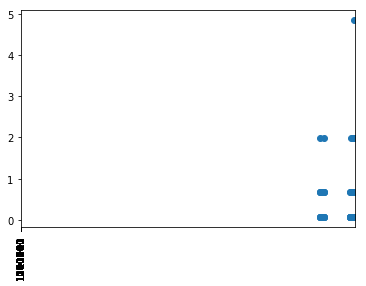

In [116]:
# plt.scatter(plot_Sequence, LLR)
# plt.xticks(np.arange(64), plot_Sequence, rotation = 90)
# plt.show()
